In [1]:
# Code by Vinnie Limnbrick 0831133 and Yesha Kaniyawala

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from windrose import WindroseAxes


import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


# Introduction and Data Preprocessing

In [2]:
df = pd.read_csv('penrose-2.csv')

In [3]:
# Look at initial dataframe

df.head()

#Bulk Export - Points as recorded                     Unnamed: 1  \
0                               NaN                              7   
1                               NaN                        Penrose   
2                               NaN  PM10.Hourly Aggregate (µg/m³)   
3             Timestamp (UTC+12:00)                  Value (µg/m³)   
4               2019-01-01 00:00:00                           17.6   

                       Unnamed: 2                   Unnamed: 3  \
0                               7                            7   
1                         Penrose                      Penrose   
2  PM2,5.Hourly Aggregate (µg/m³)  NO.Hourly Aggregate (µg/m³)   
3                   Value (µg/m³)                Value (µg/m³)   
4                             NaN                          3.8   

                     Unnamed: 4                    Unnamed: 5  \
0                             7                             7   
1                       Penrose                       Penrose   
2  NO2.Hourly Aggregate (µg/m³)  NOx.Hourly Aggregate (µg/m³)   
3                 Value (µg/m³)                 Value (µg/m³)   
4                           6.2                            10   

                     Unnamed: 6                      Unnamed: 7  \
0                             7                               7   
1                       Penrose                         Penrose   
2  SO2.Hourly Aggregate (µg/m³)  Air Temp.Hourly Aggregate (°C)   
3                 Value (µg/m³)                      Value (°C)   
4                           NaN                              20   

                          Unnamed: 8                     Unnamed: 9  \
0                                  7                              7   
1                            Penrose                        Penrose   
2  Rel Humidity.Hourly Aggregate (%)  Wind Dir.Hourly Aggregate (°)   
3                          Value (%)                      Value (°)   
4                               77.6                            221   

                             Unnamed: 10  \
0                                      7   
1                                Penrose   
2  Wind Speed m/s.Hourly Aggregate (m/s)   
3                            Value (m/s)   
4                                    3.2   

                                Unnamed: 11  
0                                         7  
1                                   Penrose  
2  AQI.Air Quality Index (AQI) - Unverified  
3                               Value (AQI)  
4                                        29

In [4]:
# Assign column names
df.columns = ['TimeStamp', 'PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'SO2', 'AirTemp','RelHumidity',  'WindDir', 'WindSpeed', 'AQI']

In [5]:
# Check column names appropriate
df.head()

TimeStamp                           PM10  \
0                    NaN                              7   
1                    NaN                        Penrose   
2                    NaN  PM10.Hourly Aggregate (µg/m³)   
3  Timestamp (UTC+12:00)                  Value (µg/m³)   
4    2019-01-01 00:00:00                           17.6   

                            PM2.5                           NO  \
0                               7                            7   
1                         Penrose                      Penrose   
2  PM2,5.Hourly Aggregate (µg/m³)  NO.Hourly Aggregate (µg/m³)   
3                   Value (µg/m³)                Value (µg/m³)   
4                             NaN                          3.8   

                            NO2                           NOX  \
0                             7                             7   
1                       Penrose                       Penrose   
2  NO2.Hourly Aggregate (µg/m³)  NOx.Hourly Aggregate (µg/m³)   
3                 Value (µg/m³)                 Value (µg/m³)   
4                           6.2                            10   

                            SO2                         AirTemp  \
0                             7                               7   
1                       Penrose                         Penrose   
2  SO2.Hourly Aggregate (µg/m³)  Air Temp.Hourly Aggregate (°C)   
3                 Value (µg/m³)                      Value (°C)   
4                           NaN                              20   

                         RelHumidity                        WindDir  \
0                                  7                              7   
1                            Penrose                        Penrose   
2  Rel Humidity.Hourly Aggregate (%)  Wind Dir.Hourly Aggregate (°)   
3                          Value (%)                      Value (°)   
4                               77.6                            221   

                               WindSpeed  \
0                                      7   
1                                Penrose   
2  Wind Speed m/s.Hourly Aggregate (m/s)   
3                            Value (m/s)   
4                                    3.2   

                                        AQI  
0                                         7  
1                                   Penrose  
2  AQI.Air Quality Index (AQI) - Unverified  
3                               Value (AQI)  
4                                        29

In [6]:
# Drop rows at index 0 to 3 inclusive
df.drop(df.index[:4], inplace=True, axis=0)

In [7]:
# Can observe rows with NaN values which are measures one minute off the hourly measurement, yet hourly measurement 
# is still taken

df.head(10)

TimeStamp  PM10 PM2.5   NO  NO2  NOX  SO2 AirTemp RelHumidity  \
4   2019-01-01 00:00:00  17.6   NaN  3.8  6.2   10  NaN      20        77.6   
5   2019-01-01 00:00:01   NaN   NaN  NaN  NaN  NaN  NaN     NaN         NaN   
6   2019-01-01 01:00:00  14.8   NaN  NaN  NaN  NaN  NaN      20        78.6   
7   2019-01-01 01:59:59   NaN   NaN  NaN  NaN  NaN  NaN     NaN         NaN   
8   2019-01-01 02:00:00  23.1   NaN  NaN  5.8  9.3  NaN      19        79.3   
9   2019-01-01 03:00:00  25.3   NaN  NaN  4.8  7.1  NaN      19        80.4   
10  2019-01-01 04:00:00  20.3   NaN  NaN  4.5  5.8  NaN      20        79.4   
11  2019-01-01 05:00:00  19.1   NaN  NaN  3.8  5.6  NaN      20        78.4   
12  2019-01-01 06:00:00  15.9   NaN  NaN  4.6  6.9  NaN      19        79.1   
13  2019-01-01 07:00:00  14.7   NaN  NaN  5.4  7.8  NaN      20        76.7   

   WindDir WindSpeed  AQI  
4      221       3.2   29  
5      NaN       NaN  NaN  
6      217       2.9   30  
7      NaN       NaN  NaN  
8      217       2.7   31  
9      221       2.2   33  
10     218       2.4   33  
11     219         3   35  
12     217       2.5   35  
13     216       2.9   36

In [8]:
df.shape

(50117, 12)

In [9]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50117 entries, 4 to 50120
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TimeStamp    50117 non-null  object
 1   PM10         41881 non-null  object
 2   PM2.5        36451 non-null  object
 3   NO           39938 non-null  object
 4   NO2          40222 non-null  object
 5   NOX          40056 non-null  object
 6   SO2          39750 non-null  object
 7   AirTemp      40734 non-null  object
 8   RelHumidity  40871 non-null  object
 9   WindDir      39595 non-null  object
 10  WindSpeed    40671 non-null  object
 11  AQI          38744 non-null  object
dtypes: object(12)
memory usage: 4.6+ MB


In [10]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df['PM10'] = df['PM10'].astype(float)
df['PM2.5'] = df['PM2.5'].astype(float)
df['NO'] = df['NO'].astype(float)
df['NO2'] = df['NO2'].astype(float)
df['NOX'] = df['NOX'].astype(float)
df['SO2'] = df['SO2'].astype(float)
df['AirTemp'] = df['AirTemp'].astype(float)
df['RelHumidity'] = df['RelHumidity'].astype(float)
df['WindDir'] = df['WindDir'].astype(float)
df['WindSpeed'] = df['WindSpeed'].astype(float)
df['AQI'] = df['AQI'].astype(float)

In [11]:
# Checking features are all appropriate data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50117 entries, 4 to 50120
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TimeStamp    50117 non-null  datetime64[ns]
 1   PM10         41881 non-null  float64       
 2   PM2.5        36451 non-null  float64       
 3   NO           39938 non-null  float64       
 4   NO2          40222 non-null  float64       
 5   NOX          40056 non-null  float64       
 6   SO2          39750 non-null  float64       
 7   AirTemp      40734 non-null  float64       
 8   RelHumidity  40871 non-null  float64       
 9   WindDir      39595 non-null  float64       
 10  WindSpeed    40671 non-null  float64       
 11  AQI          38744 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 MB


In [12]:
# Checking number of na values
df.isna().sum()

TimeStamp          0
PM10            8236
PM2.5          13666
NO             10179
NO2             9895
NOX            10061
SO2            10367
AirTemp         9383
RelHumidity     9246
WindDir        10522
WindSpeed       9446
AQI            11373
dtype: int64

C:\Users\vinni\AppData\Local\Temp\ipykernel_24352\1573120521.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


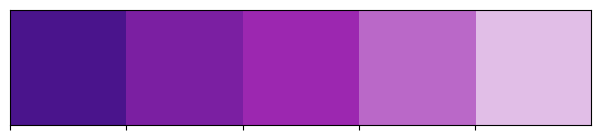

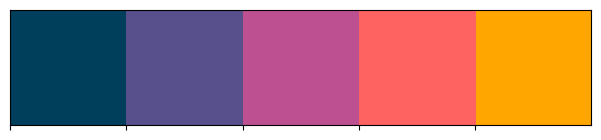

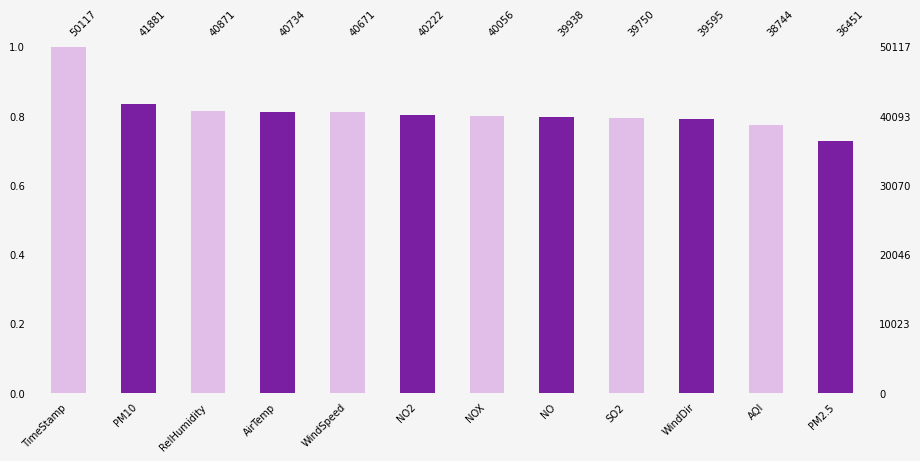

In [13]:
colors = ['#4a148c', '#7b1fa2', '#9c27b0', '#ba68c8', '#e1bee7']
palette = sns.color_palette(palette=colors)
sns.palplot(palette, size=1.5)

# Colors are chosen to be distinct and suitable for various data visualizations
colors2 = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
palette = sns.color_palette(palette=colors2)
sns.palplot(palette, size=1.5)

#visualising the missing data

color = [colors[4],colors[1]]*4
fig, ax = plt.subplots(figsize = (12,5), dpi = 90)
# fig.patch.set_facecolor('#EDF6E5')
# ax.set_facecolor('#EDF6E5')

# Set the background color of the figure and the axes
fig.patch.set_facecolor('#f5f5f5')  # light grey color for the figure background
ax.set_facecolor('#f5f5f5')         # light grey color for the axes background
msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')
fig.show()

In [14]:
df.describe()

TimeStamp          PM10         PM2.5  \
count                          50117  41881.000000  36451.000000   
mean   2021-07-23 10:41:06.344893184     14.446842      5.665299   
min              2019-01-01 00:00:00     -9.500000    -12.300000   
25%              2020-04-29 00:00:00      8.700000      2.700000   
50%              2021-08-01 14:00:00     13.500000      5.100000   
75%              2022-10-29 02:00:00     19.100000      7.800000   
max              2023-12-31 00:00:00    247.500000    138.400000   
std                              NaN      8.496800      4.896633   

                 NO           NO2           NOX           SO2       AirTemp  \
count  39938.000000  40222.000000  40056.000000  39750.000000  40734.000000   
mean      10.278016     14.578656     24.814188      1.022684     16.399691   
min       -1.900000     -3.900000     -4.100000     -4.400000      3.000000   
25%        0.900000      4.400000      5.800000      0.300000     14.000000   
50%        3.800000     10.900000     15.500000      0.700000     16.000000   
75%       11.200000     21.300000     32.200000      1.300000     19.000000   
max      378.400000     83.100000    455.100000     25.200000     28.000000   
std       21.050872     12.872704     30.965700      1.434505      3.921447   

        RelHumidity       WindDir     WindSpeed           AQI  
count  40871.000000  39595.000000  40671.000000  38744.000000  
mean      71.212821    180.261422      2.811268     29.628665  
min       26.900000      1.000000      0.100000     -8.000000  
25%       61.800000     85.000000      1.500000     22.000000  
50%       72.100000    214.000000      2.600000     28.000000  
75%       81.300000    238.000000      3.900000     36.000000  
max      100.000000    357.000000      8.700000    121.000000  
std       12.799959     92.853428      1.584044     11.073391

In [15]:
# Data observations
# Negative particulate concentrations will need to be removed, could indicate poor equipment calibration, faulty equipment
# Data will require scaling due to different scales and variation between

In [16]:
df.head(10)

TimeStamp  PM10  PM2.5   NO  NO2   NOX  SO2  AirTemp  \
4  2019-01-01 00:00:00  17.6    NaN  3.8  6.2  10.0  NaN     20.0   
5  2019-01-01 00:00:01   NaN    NaN  NaN  NaN   NaN  NaN      NaN   
6  2019-01-01 01:00:00  14.8    NaN  NaN  NaN   NaN  NaN     20.0   
7  2019-01-01 01:59:59   NaN    NaN  NaN  NaN   NaN  NaN      NaN   
8  2019-01-01 02:00:00  23.1    NaN  NaN  5.8   9.3  NaN     19.0   
9  2019-01-01 03:00:00  25.3    NaN  NaN  4.8   7.1  NaN     19.0   
10 2019-01-01 04:00:00  20.3    NaN  NaN  4.5   5.8  NaN     20.0   
11 2019-01-01 05:00:00  19.1    NaN  NaN  3.8   5.6  NaN     20.0   
12 2019-01-01 06:00:00  15.9    NaN  NaN  4.6   6.9  NaN     19.0   
13 2019-01-01 07:00:00  14.7    NaN  NaN  5.4   7.8  NaN     20.0   

    RelHumidity  WindDir  WindSpeed   AQI  
4          77.6    221.0        3.2  29.0  
5           NaN      NaN        NaN   NaN  
6          78.6    217.0        2.9  30.0  
7           NaN      NaN        NaN   NaN  
8          79.3    217.0        2.7  31.0  
9          80.4    221.0        2.2  33.0  
10         79.4    218.0        2.4  33.0  
11         78.4    219.0        3.0  35.0  
12         79.1    217.0        2.5  35.0  
13         76.7    216.0        2.9  36.0

In [17]:
# AQI is unnecessary measure as it is calculated through combination of factors which are pollution (such as the target)
# and as such AQI is determined by the target, not the target influenced by AQI

df.drop('AQI', axis=1, inplace=True)

In [18]:
# Filter to find rows where the TimeStamp does not end in '00' and all other columns are NaN

# Dropping all 'intermediate' measure times so only measuremeants on the hour are in dataframe
df = df[(df['TimeStamp'].dt.minute == 0) & (df['TimeStamp'].dt.second == 0)]

# Checking no feature 'counts' are lost through dropping rows
# Counts for each feature are the same, no relevant data lost through dropping these rows
df.describe()

TimeStamp          PM10         PM2.5  \
count                          43568  41881.000000  36451.000000   
mean   2021-07-04 15:41:12.521116416     14.446842      5.665299   
min              2019-01-01 00:00:00     -9.500000    -12.300000   
25%              2020-04-07 20:45:00      8.700000      2.700000   
50%              2021-07-05 16:30:00     13.500000      5.100000   
75%              2022-10-02 13:15:00     19.100000      7.800000   
max              2023-12-31 00:00:00    247.500000    138.400000   
std                              NaN      8.496800      4.896633   

                 NO           NO2           NOX           SO2       AirTemp  \
count  39938.000000  40222.000000  40056.000000  39750.000000  40734.000000   
mean      10.278016     14.578656     24.814188      1.022684     16.399691   
min       -1.900000     -3.900000     -4.100000     -4.400000      3.000000   
25%        0.900000      4.400000      5.800000      0.300000     14.000000   
50%        3.800000     10.900000     15.500000      0.700000     16.000000   
75%       11.200000     21.300000     32.200000      1.300000     19.000000   
max      378.400000     83.100000    455.100000     25.200000     28.000000   
std       21.050872     12.872704     30.965700      1.434505      3.921447   

        RelHumidity       WindDir     WindSpeed  
count  40871.000000  39595.000000  40671.000000  
mean      71.212821    180.261422      2.811268  
min       26.900000      1.000000      0.100000  
25%       61.800000     85.000000      1.500000  
50%       72.100000    214.000000      2.600000  
75%       81.300000    238.000000      3.900000  
max      100.000000    357.000000      8.700000  
std       12.799959     92.853428      1.584044

In [19]:
# Checking the correct rows from the top 10 entries are dropped
df.head(10)

TimeStamp  PM10  PM2.5   NO  NO2   NOX  SO2  AirTemp  \
4  2019-01-01 00:00:00  17.6    NaN  3.8  6.2  10.0  NaN     20.0   
6  2019-01-01 01:00:00  14.8    NaN  NaN  NaN   NaN  NaN     20.0   
8  2019-01-01 02:00:00  23.1    NaN  NaN  5.8   9.3  NaN     19.0   
9  2019-01-01 03:00:00  25.3    NaN  NaN  4.8   7.1  NaN     19.0   
10 2019-01-01 04:00:00  20.3    NaN  NaN  4.5   5.8  NaN     20.0   
11 2019-01-01 05:00:00  19.1    NaN  NaN  3.8   5.6  NaN     20.0   
12 2019-01-01 06:00:00  15.9    NaN  NaN  4.6   6.9  NaN     19.0   
13 2019-01-01 07:00:00  14.7    NaN  NaN  5.4   7.8  NaN     20.0   
14 2019-01-01 08:00:00  15.6    NaN  NaN  3.8   6.3  NaN     21.0   
15 2019-01-01 09:00:00  16.7    NaN  NaN  4.6   8.0  NaN     21.0   

    RelHumidity  WindDir  WindSpeed  
4          77.6    221.0        3.2  
6          78.6    217.0        2.9  
8          79.3    217.0        2.7  
9          80.4    221.0        2.2  
10         79.4    218.0        2.4  
11         78.4    219.0        3.0  
12         79.1    217.0        2.5  
13         76.7    216.0        2.9  
14         71.7    215.0        3.4  
15         71.3    219.0        3.7

In [20]:
# Check for duplicate rows in dataframe
df.duplicated().any()

False

In [21]:
# NOX appears to be aggregate of NO and NO2, dropping as it is redundant information

df.drop('NOX', axis=1, inplace=True)
df.head()

TimeStamp  PM10  PM2.5   NO  NO2  SO2  AirTemp  RelHumidity  \
4  2019-01-01 00:00:00  17.6    NaN  3.8  6.2  NaN     20.0         77.6   
6  2019-01-01 01:00:00  14.8    NaN  NaN  NaN  NaN     20.0         78.6   
8  2019-01-01 02:00:00  23.1    NaN  NaN  5.8  NaN     19.0         79.3   
9  2019-01-01 03:00:00  25.3    NaN  NaN  4.8  NaN     19.0         80.4   
10 2019-01-01 04:00:00  20.3    NaN  NaN  4.5  NaN     20.0         79.4   

    WindDir  WindSpeed  
4     221.0        3.2  
6     217.0        2.9  
8     217.0        2.7  
9     221.0        2.2  
10    218.0        2.4

In [22]:
# More valid PM10 data available, so exploring data with this as target (41881.000000 	36451.000000)

# df_1 = df.drop('PM2.5', axis=1)

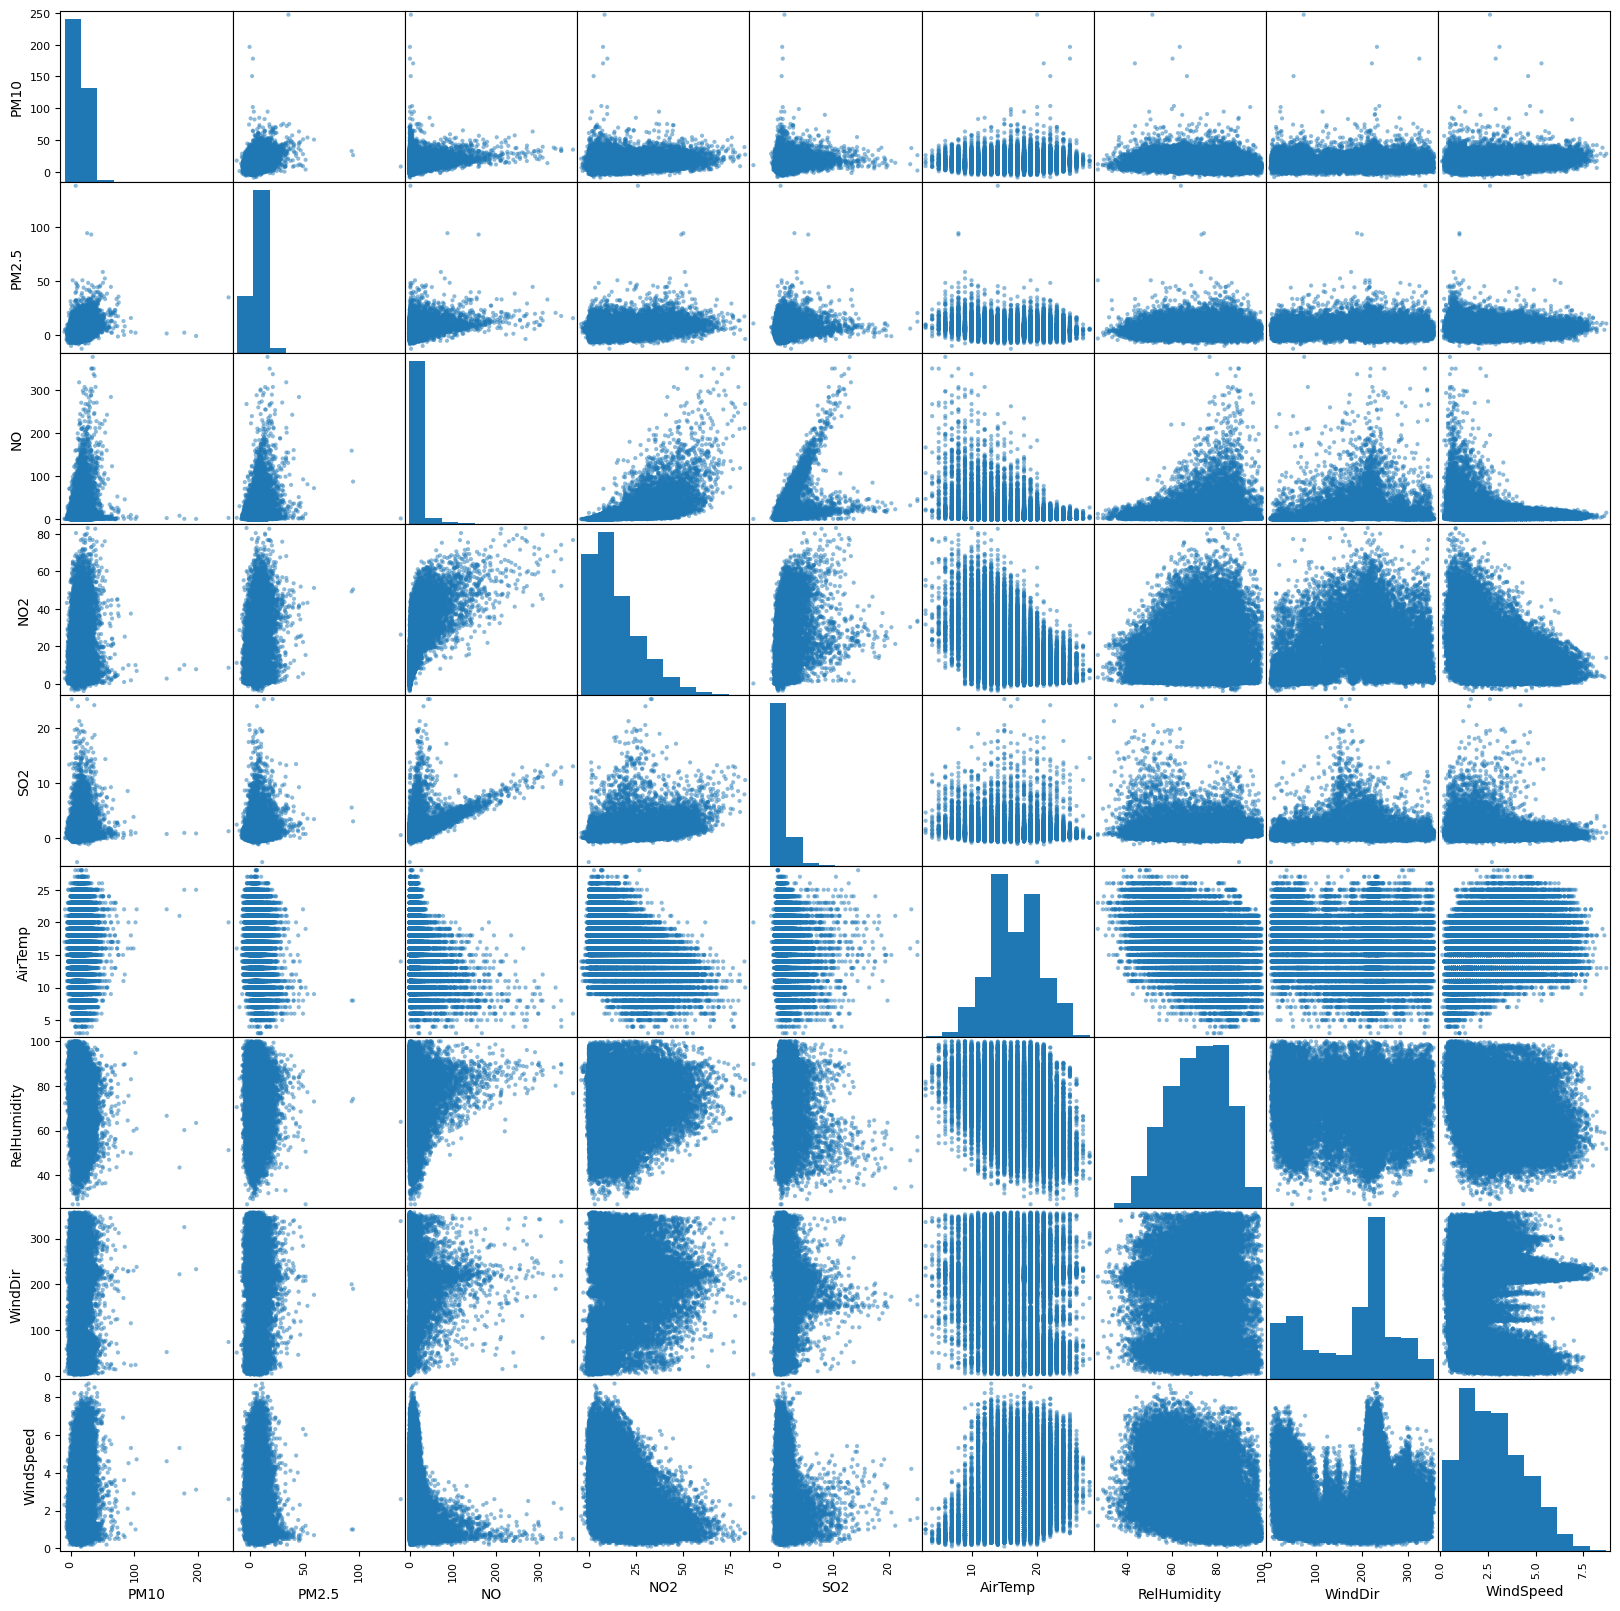

In [23]:
# Viewing data spread and distribution prior to dropping any values
# At glance PM10 and PM2.5 have somewhat similar relations to other data
pd.plotting.scatter_matrix(df,figsize=[20,20]) 
plt.show()

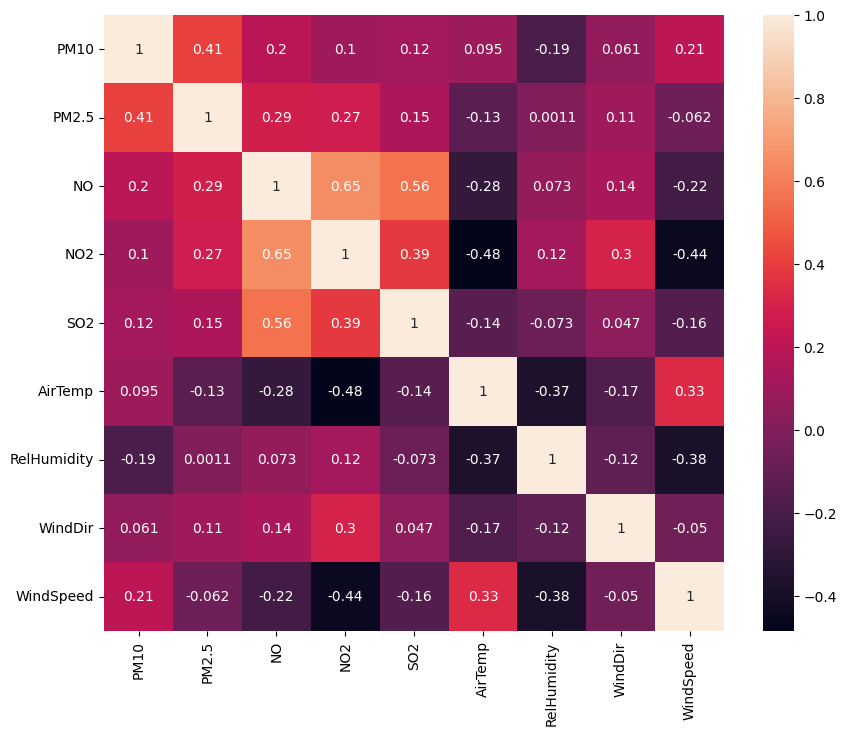

                 PM10     PM2.5        NO       NO2       SO2   AirTemp  \
PM10         1.000000  0.408624  0.197262  0.104162  0.120622  0.095179   
PM2.5        0.408624  1.000000  0.286994  0.271174  0.153917 -0.134124   
NO           0.197262  0.286994  1.000000  0.648913  0.562729 -0.277749   
NO2          0.104162  0.271174  0.648913  1.000000  0.386024 -0.483209   
SO2          0.120622  0.153917  0.562729  0.386024  1.000000 -0.143188   
AirTemp      0.095179 -0.134124 -0.277749 -0.483209 -0.143188  1.000000   
RelHumidity -0.192010  0.001147  0.072927  0.122850 -0.072516 -0.370489   
WindDir      0.061061  0.105170  0.138808  0.299511  0.047277 -0.171645   
WindSpeed    0.206254 -0.061814 -0.217570 -0.441786 -0.159105  0.328167   

             RelHumidity   WindDir  WindSpeed  
PM10           -0.192010  0.061061   0.206254  
PM2.5           0.001147  0.105170  -0.061814  
NO              0.072927  0.138808  -0.217570  
NO2             0.122850  0.299511  -0.441786  
SO2      

In [24]:
 
# df1 = df.drop(['PM10', 'TimeStamp'], axis=1)
df_corr = df.drop('TimeStamp', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, xticklabels=True, yticklabels=True)
plt.show()

print(df_corr.corr())

# PM2.5 has stronger Pearson correlation with NO, NO2 and SO2, may be more suitable choice for target than PM10

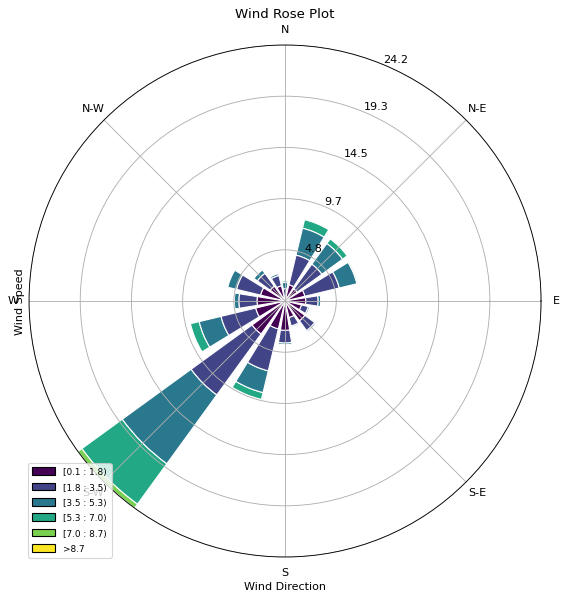

In [25]:
# Visualising wind plot
# Because wind is a circular/modular variable it cannot be read linearly in a linear regression
# Wind direction is circular, cannot be read linearly and Pearson correlations are erroneous
direction = df['WindDir']
speed = df['WindSpeed']

ax = WindroseAxes.from_ax()
ax.bar(direction, speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

plt.title('Wind Rose Plot')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')

plt.show()

# Wind at station location appears to primarily be south west in direction
# Wind is a modular variable and linear patterns cannot be observed, Pearson correlation tells nothing of relationship

In [26]:
# Wind direction is an angular variable, which may confuse the model with it's cyclical nature 
# for example the mean wind direction between 350 and 10 degrees should be 10, however will be 180 mathematically
df.drop('WindDir', axis=1, inplace=True)

C:\Users\vinni\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinni\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinni\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vinni\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

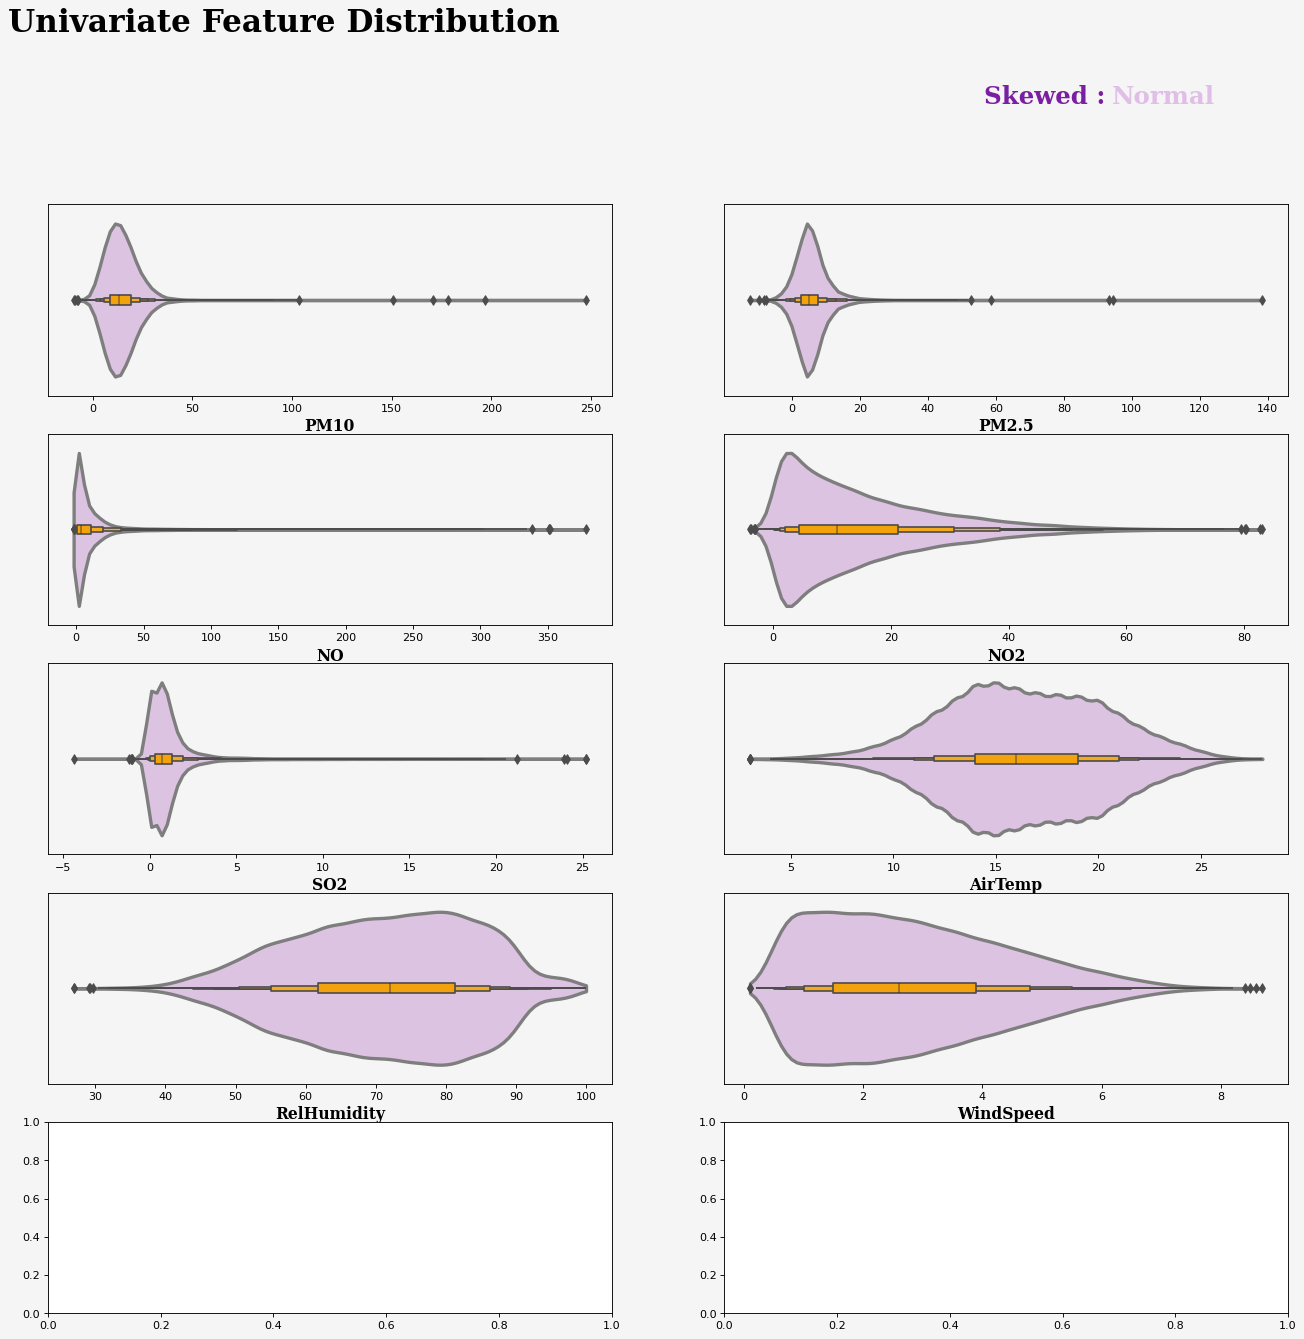

In [27]:
# Univariate analysis
# Code from https://www.kaggle.com/code/devishu14/95-auc-diabetes-prediction-eda/notebook, applied to dataset here
# Viewing distribution of data
# All pollutant concentrations have a left skew, with outliers on the right side of the distrbution
# Will perform transformation (with StandardScaler) prior to regression to normalize the input features

from scipy.stats import kurtosis, skew

feat_df = df.drop('TimeStamp', axis=1)

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 18), dpi=80)
fig.patch.set_facecolor('#f5f5f5')
axes = ax.ravel()

for col, ax in zip(feat_df.columns, axes):
    
    if skew(feat_df[col]) > 1:
        color = colors[1]
    else:
        color = colors[4]
    
    sns.violinplot(x=feat_df[col], ax=ax, cut=0, color=color, inner=None, order=sorted,
                   alpha=0.6, linewidth=3, edgecolor='solidblack', saturation=0.75, orient="horizontal")

    sns.boxenplot(x=feat_df[col], ax=ax, saturation=0.9, palette=[colors2[4]], width=0.05)
    
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    ax.axes.set_xlabel(col, {'font': 'serif', 'size': 14, 'weight': 'bold'}, alpha=1)
    ax.set_facecolor('#f6f5f5')

## titles and text
fig.text(0.1, 1, 'Univariate Feature Distribution', {'font': 'serif', 'size': 28, 'weight': 'bold'}, alpha=1)
# fig.text(0.1, 0.90, '''Checking distribution and skewness of data. 
# Here we can check for the skewness of the features. While we can see that the meteorological data 
# contains mostly normally distrbuted data, the particulate matter and pollution data is all left skewed 
# and contains significant outliers.''',
#          {'font': 'serif', 'size': 22, 'weight': 'normal'}, alpha=1)
fig.text(0.710, 0.95, "Skewed :", {'font': 'serif', 'size': 22, 'weight': 'bold', 'color': colors[1]})
#fig.text(0.785, 0.95, '|', {'font': 'serif', 'size': 20, 'weight': 'bold'})
fig.text(0.79, 0.95, "Normal", {'font': 'serif', 'size': 22, 'weight': 'bold', 'color': colors[4]})
plt.show()

In [28]:
# Keep df copy at point
df_copy = df.copy()

# Keeping copy of PM10 for model and target comparison
df_pm10 = df.drop("PM2.5", axis=1)

# Dropping variable to keep only one target variable
df.drop("PM10", inplace=True, axis=1)


df.head()
df_pm10.head()

TimeStamp  PM10   NO  NO2  SO2  AirTemp  RelHumidity  WindSpeed
4  2019-01-01 00:00:00  17.6  3.8  6.2  NaN     20.0         77.6        3.2
6  2019-01-01 01:00:00  14.8  NaN  NaN  NaN     20.0         78.6        2.9
8  2019-01-01 02:00:00  23.1  NaN  5.8  NaN     19.0         79.3        2.7
9  2019-01-01 03:00:00  25.3  NaN  4.8  NaN     19.0         80.4        2.2
10 2019-01-01 04:00:00  20.3  NaN  4.5  NaN     20.0         79.4        2.4

In [29]:
# Creating time lag variables
df['lag1'] = df["PM2.5"].shift(1)  # Lag 1: PM concentration for h-1
df['lag2'] = df["PM2.5"].shift(2)  # Lag 2: PM concentration for h-2

df_pm10['lag1'] = df_pm10["PM10"].shift(1)  # Lag 1: PM concentration for h-1
df_pm10['lag2'] = df_pm10["PM10"].shift(2)  # Lag 2: PM concentration for h-2



df_pm10.head()

TimeStamp  PM10   NO  NO2  SO2  AirTemp  RelHumidity  WindSpeed  \
4  2019-01-01 00:00:00  17.6  3.8  6.2  NaN     20.0         77.6        3.2   
6  2019-01-01 01:00:00  14.8  NaN  NaN  NaN     20.0         78.6        2.9   
8  2019-01-01 02:00:00  23.1  NaN  5.8  NaN     19.0         79.3        2.7   
9  2019-01-01 03:00:00  25.3  NaN  4.8  NaN     19.0         80.4        2.2   
10 2019-01-01 04:00:00  20.3  NaN  4.5  NaN     20.0         79.4        2.4   

    lag1  lag2  
4    NaN   NaN  
6   17.6   NaN  
8   14.8  17.6  
9   23.1  14.8  
10  25.3  23.1

In [30]:
# Checking lag variables correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43568 entries, 4 to 50120
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TimeStamp    43568 non-null  datetime64[ns]
 1   PM2.5        36451 non-null  float64       
 2   NO           39938 non-null  float64       
 3   NO2          40222 non-null  float64       
 4   SO2          39750 non-null  float64       
 5   AirTemp      40734 non-null  float64       
 6   RelHumidity  40871 non-null  float64       
 7   WindSpeed    40671 non-null  float64       
 8   lag1         36451 non-null  float64       
 9   lag2         36451 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 3.7 MB


In [31]:
# Changing negative concentrations of particulates to NaN in order to drop erroneous values

df.iloc[:, 1:-2] = df.iloc[:, 1:-2].applymap(lambda x: np.nan if x < 0 else x)
print(df.describe())

df_pm10.iloc[:, 1:-2] = df_pm10.iloc[:, 1:-2].applymap(lambda x: np.nan if x < 0 else x)
print(df_pm10.describe())

                           TimeStamp         PM2.5            NO  \
count                          43568  33548.000000  38950.000000   
mean   2021-07-04 15:41:12.521116416      6.311214     10.546095   
min              2019-01-01 00:00:00      0.000000      0.000000   
25%              2020-04-07 20:45:00      3.400000      1.000000   
50%              2021-07-05 16:30:00      5.500000      4.000000   
75%              2022-10-02 13:15:00      8.100000     11.500000   
max              2023-12-31 00:00:00    138.400000    378.400000   
std                              NaN      4.541123     21.247904   

                NO2           SO2       AirTemp   RelHumidity     WindSpeed  \
count  40030.000000  36925.000000  40734.000000  40871.000000  40671.000000   
mean      14.651371      1.115632     16.399691     71.212821      2.811268   
min        0.000000      0.000000      3.000000     26.900000      0.100000   
25%        4.500000      0.400000     14.000000     61.800000      1.50

C:\Users\vinni\AppData\Local\Temp\ipykernel_24352\1565558361.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.iloc[:, 1:-2] = df.iloc[:, 1:-2].applymap(lambda x: np.nan if x < 0 else x)
C:\Users\vinni\AppData\Local\Temp\ipykernel_24352\1565558361.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pm10.iloc[:, 1:-2] = df_pm10.iloc[:, 1:-2].applymap(lambda x: np.nan if x < 0 else x)


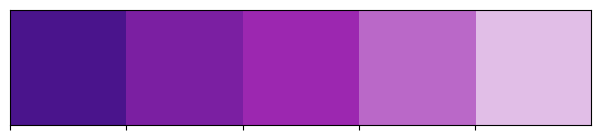

In [32]:
colors = ['#4a148c', '#7b1fa2', '#9c27b0', '#ba68c8', '#e1bee7']
palette = sns.color_palette(palette=colors)
sns.palplot(palette, size=1.5)

C:\Users\vinni\AppData\Local\Temp\ipykernel_24352\2657397610.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


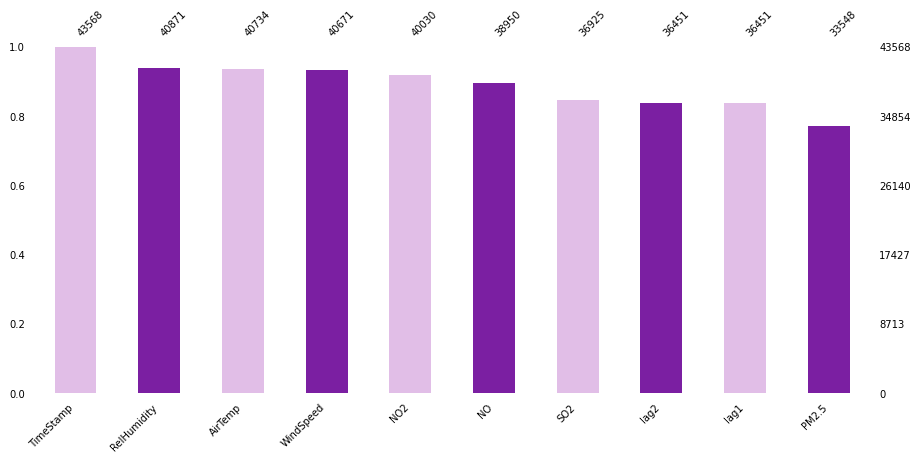

In [33]:
#visualising the missing data

color = [colors[4],colors[1]]*4
fig, ax = plt.subplots(figsize = (12,5), dpi = 90)
# fig.patch.set_facecolor('#EDF6E5')
# ax.set_facecolor('#EDF6E5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')
fig.show()

In [34]:
# Checking NaNs have been dealt with

df.dropna(axis=0, inplace=True)
df.info()

df_pm10.dropna(axis=0, inplace=True)
df_pm10.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25483 entries, 2842 to 49886
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TimeStamp    25483 non-null  datetime64[ns]
 1   PM2.5        25483 non-null  float64       
 2   NO           25483 non-null  float64       
 3   NO2          25483 non-null  float64       
 4   SO2          25483 non-null  float64       
 5   AirTemp      25483 non-null  float64       
 6   RelHumidity  25483 non-null  float64       
 7   WindSpeed    25483 non-null  float64       
 8   lag1         25483 non-null  float64       
 9   lag2         25483 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 30054 entries, 1763 to 50116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TimeStamp    30054 non-null  datetim

In [35]:
# Looking for other inconsistencies in data and outliers

df.describe(include='all')

TimeStamp         PM2.5            NO  \
count                          25483  25483.000000  25483.000000   
mean   2021-08-30 06:33:31.270258688      6.366201     11.436989   
min              2019-04-22 06:00:00      0.000000      0.000000   
25%              2020-07-03 04:30:00      3.500000      1.200000   
50%              2021-10-09 05:00:00      5.500000      4.400000   
75%              2022-09-22 20:00:00      8.200000     12.700000   
max              2023-12-23 05:00:00    138.400000    378.400000   
std                              NaN      4.593035     22.181267   

                NO2           SO2       AirTemp   RelHumidity     WindSpeed  \
count  25483.000000  25483.000000  25483.000000  25483.000000  25483.000000   
mean      15.874438      1.119436     16.103795     70.881191      2.859683   
min        0.000000      0.000000      3.000000     26.900000      0.100000   
25%        5.100000      0.400000     13.000000     61.350000      1.500000   
50%       12.200000      0.800000     16.000000     71.700000      2.600000   
75%       23.300000      1.300000     19.000000     81.000000      4.000000   
max       82.700000     25.200000     28.000000    100.000000      8.700000   
std       13.462818      1.454330      3.858794     12.835215      1.616267   

               lag1          lag2  
count  25483.000000  25483.000000  
mean       6.134611      5.948986  
min       -9.700000    -12.300000  
25%        3.300000      3.100000  
50%        5.500000      5.400000  
75%        8.200000      8.100000  
max      138.400000    138.400000  
std        4.849751      4.855592

In [36]:
# Using the Inter Quartile Method for handling outliers for NO, NO2, and SO2

features = ['NO', 'NO2', 'SO2']
multiplier = 1.5

for feature in features:
    # Calculate the IQR for the current feature
    Q1 = df_pm10[feature].quantile(0.05)
    Q3 = df_pm10[feature].quantile(0.95)
    IQR = Q3 - Q1

    upper_threshold = Q3 + (multiplier * IQR)

    # Identify the indices of the upper outliers for the current feature
    outlier_indices = df_pm10[df_pm10[feature] > upper_threshold].index

    # Remove the upper outliers from the cleaned data only for the current feature
    df_pm10.loc[outlier_indices, feature] = np.nan
    
# Describe the cleaned data
print(df_pm10.describe())

# Drop any remaining NaN values
df_pm10 = df_pm10.dropna()

# Print the info of the cleaned DataFrame
print(df_pm10.info())

                           TimeStamp          PM10            NO  \
count                          30054  30054.000000  29726.000000   
mean   2021-09-11 05:14:06.396486400     14.772463      9.874541   
min              2019-03-11 02:00:00      0.000000      0.000000   
25%              2020-07-10 07:15:00      9.000000      1.100000   
50%              2021-10-18 15:30:00     13.800000      4.300000   
75%              2022-10-10 05:45:00     19.300000     12.300000   
max              2023-12-30 22:00:00    247.500000    111.400000   
std                              NaN      8.320840     15.170079   

                NO2           SO2       AirTemp   RelHumidity     WindSpeed  \
count  30054.000000  29812.000000  30054.000000  30054.000000  30054.000000   
mean      15.803334      1.052392     16.130831     71.003554      2.847395   
min        0.000000      0.000000      3.000000     26.900000      0.100000   
25%        5.000000      0.400000     14.000000     61.400000      1.50

In [37]:
# On df dataframe for the target PM2.5
# Inter Quartile Method for handling outliers for NO, NO2 and SO2

features = ['NO', 'NO2', 'SO2']
multiplier = 1.5

for feature in features:
    # Calculate the IQR for the current feature
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1


    upper_threshold = Q3 + (multiplier * IQR)

    # Identify the indices of the upper outliers for the current feature
    outlier_indices = df[df[feature] > upper_threshold].index

    # Remove the upper outliers from the cleaned data only for the current feature
    df.loc[outlier_indices, feature] = np.nan
    
df.describe()

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25044 entries, 2842 to 49886
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TimeStamp    25044 non-null  datetime64[ns]
 1   PM2.5        25044 non-null  float64       
 2   NO           25044 non-null  float64       
 3   NO2          25044 non-null  float64       
 4   SO2          25044 non-null  float64       
 5   AirTemp      25044 non-null  float64       
 6   RelHumidity  25044 non-null  float64       
 7   WindSpeed    25044 non-null  float64       
 8   lag1         25044 non-null  float64       
 9   lag2         25044 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.1 MB


In [38]:
# Viewing distirbution and spread of data again
# Pollution features all contain high outliers, 10-30 times larger than upper-quartile values
df.describe()

TimeStamp         PM2.5            NO  \
count                          25044  25044.000000  25044.000000   
mean   2021-09-01 06:24:42.462865408      6.271706      9.697444   
min              2019-04-22 06:00:00      0.000000      0.000000   
25%              2020-07-04 06:30:00      3.400000      1.100000   
50%              2021-10-11 23:30:00      5.500000      4.300000   
75%              2022-09-26 02:15:00      8.100000     12.000000   
max              2023-12-23 05:00:00    138.400000    109.500000   
std                              NaN      4.439300     14.861467   

                NO2           SO2       AirTemp   RelHumidity     WindSpeed  \
count  25044.000000  25044.000000  25044.000000  25044.000000  25044.000000   
mean      15.410565      0.993967     16.168663     70.879536      2.882978   
min        0.000000      0.000000      3.000000     26.900000      0.100000   
25%        5.000000      0.400000     14.000000     61.400000      1.500000   
50%       11.900000      0.800000     16.000000     71.600000      2.700000   
75%       22.800000      1.300000     19.000000     80.900000      4.000000   
max       75.200000      8.200000     28.000000    100.000000      8.700000   
std       12.909570      0.993932      3.813682     12.785343      1.615249   

               lag1          lag2  
count  25044.000000  25044.000000  
mean       6.065836      5.897860  
min       -9.700000    -12.300000  
25%        3.200000      3.000000  
50%        5.500000      5.300000  
75%        8.100000      8.000000  
max      138.400000    138.400000  
std        4.772703      4.808086

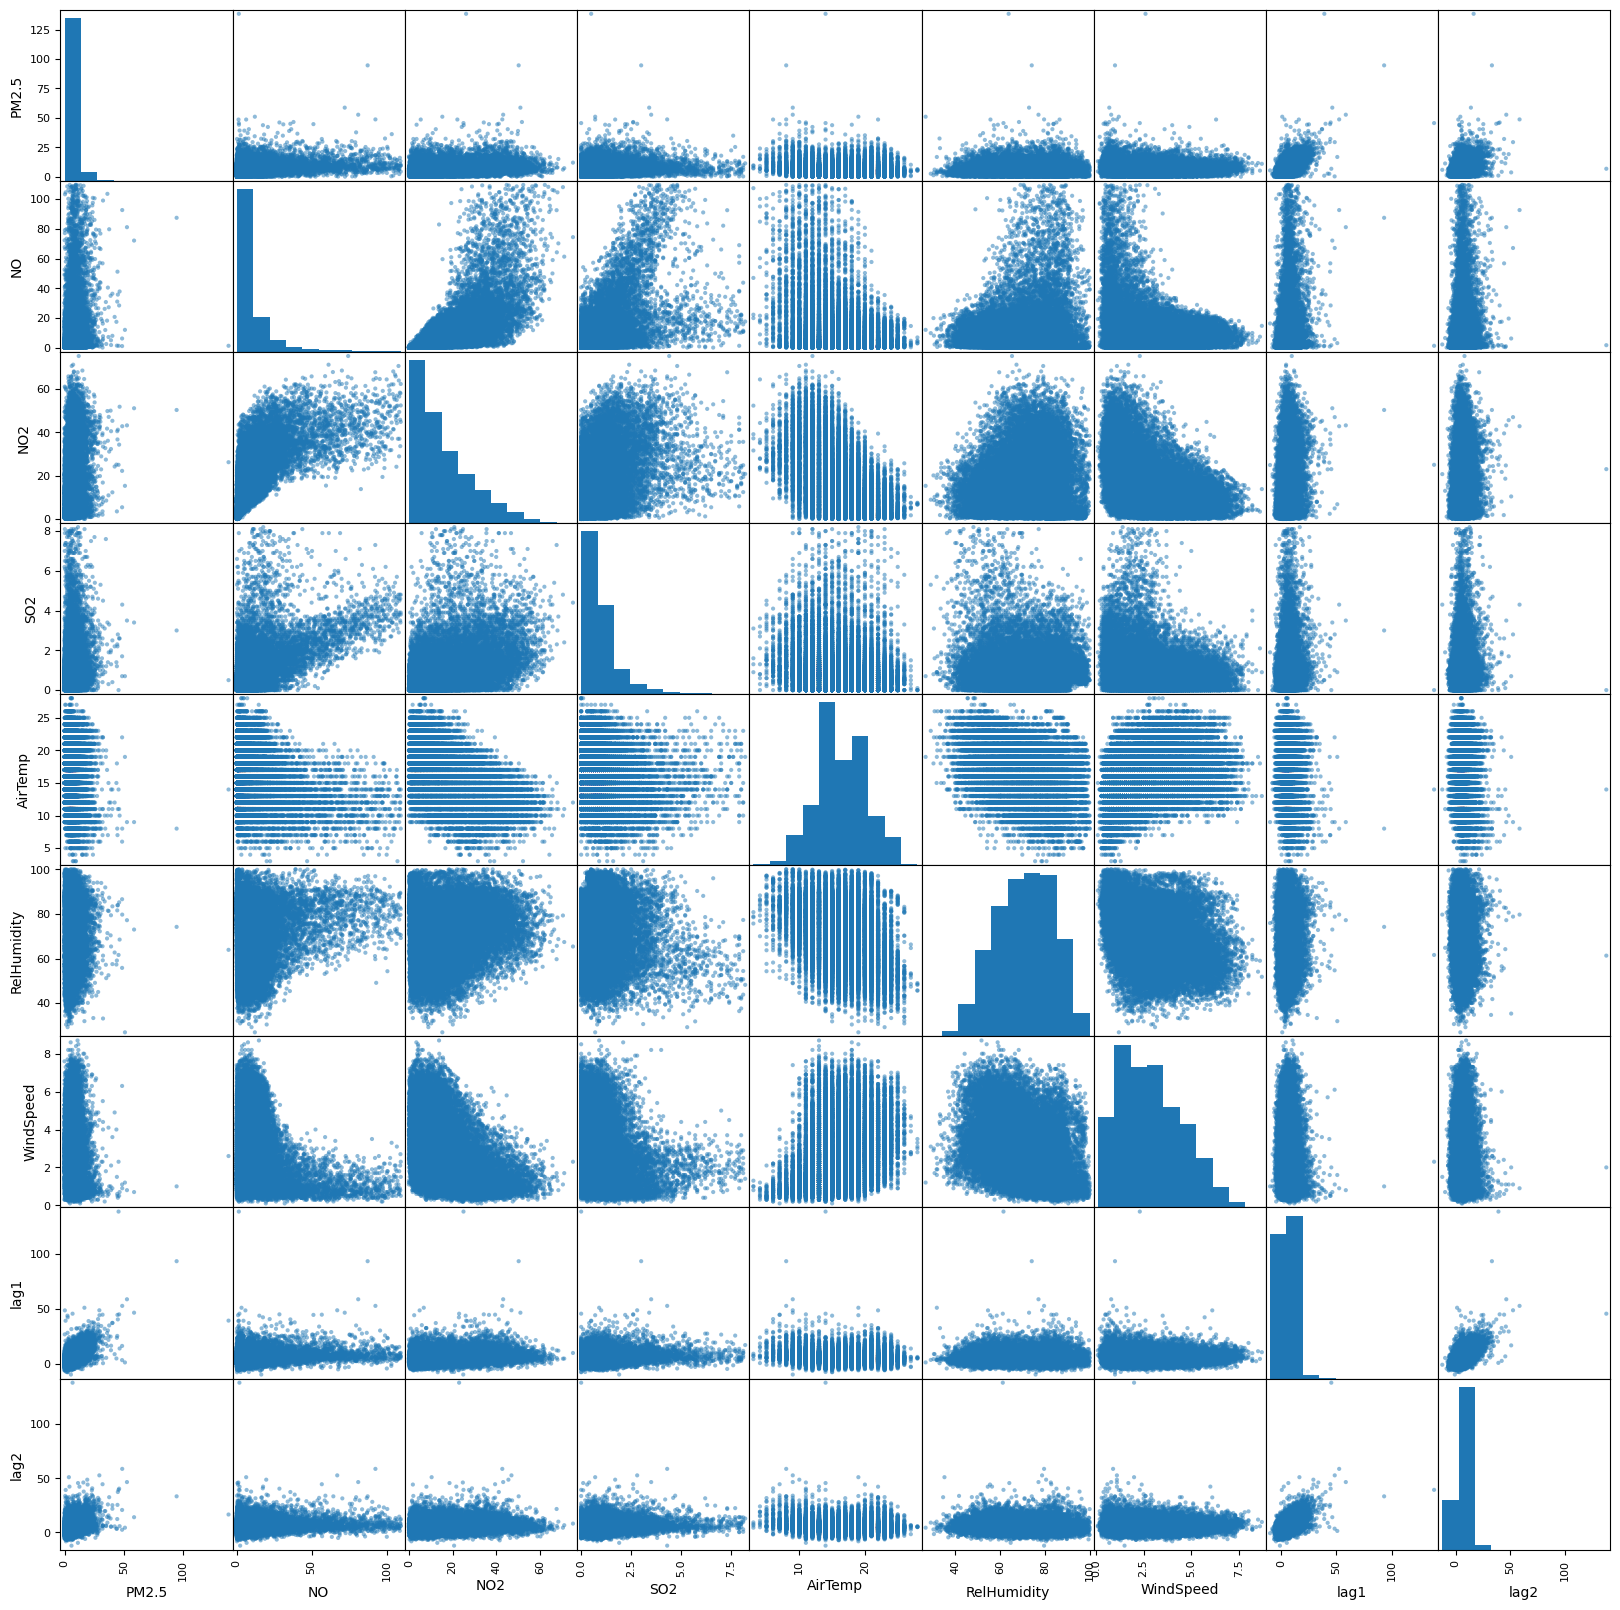

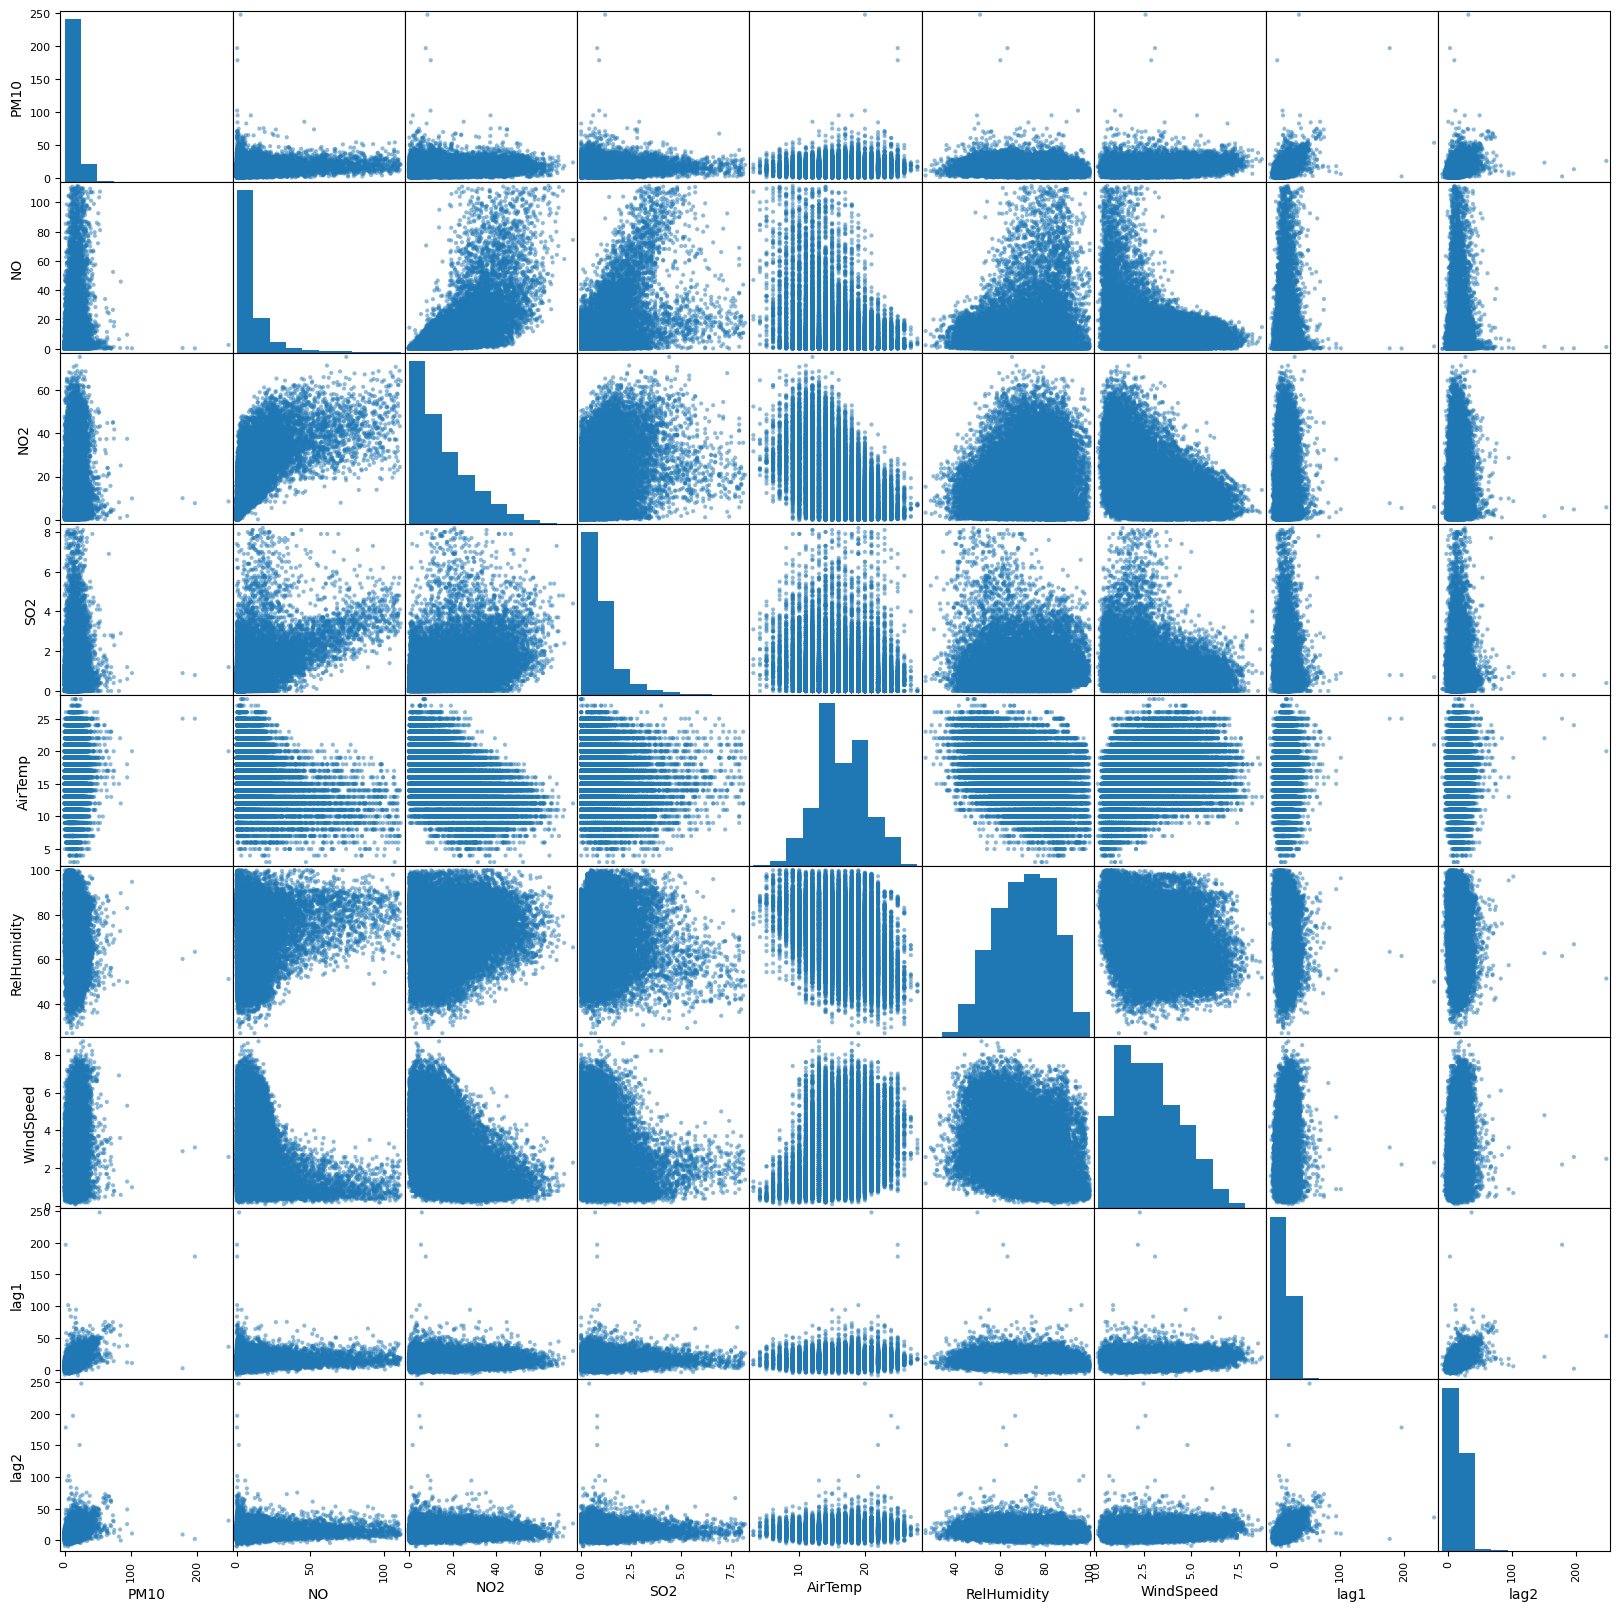

In [39]:
#Observing data after cleaning

pd.plotting.scatter_matrix(df,figsize=[20,20]) 
plt.show()

pd.plotting.scatter_matrix(df_pm10,figsize=[20,20]) 
plt.show()

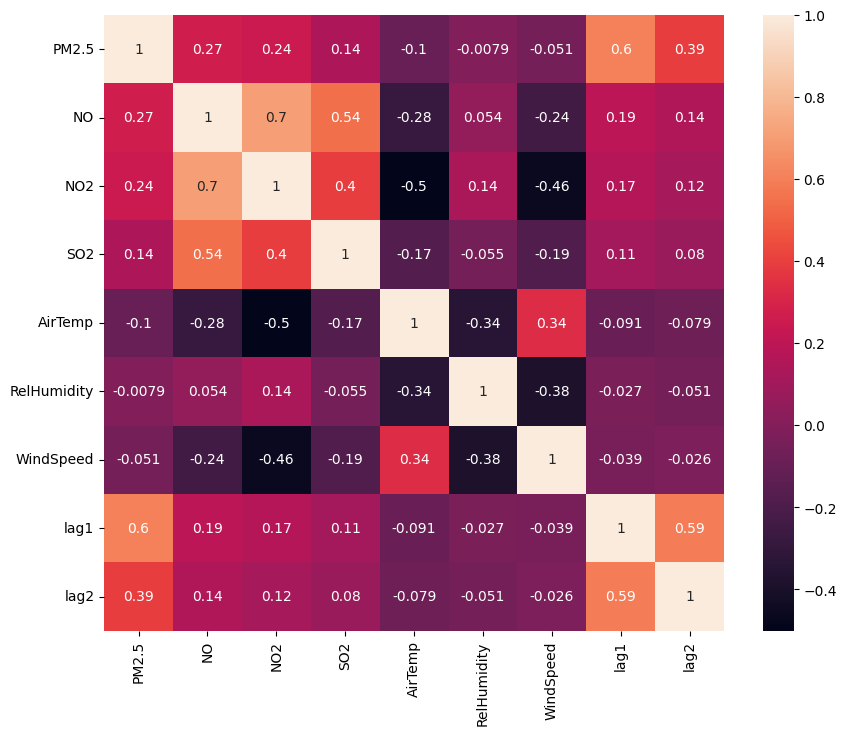

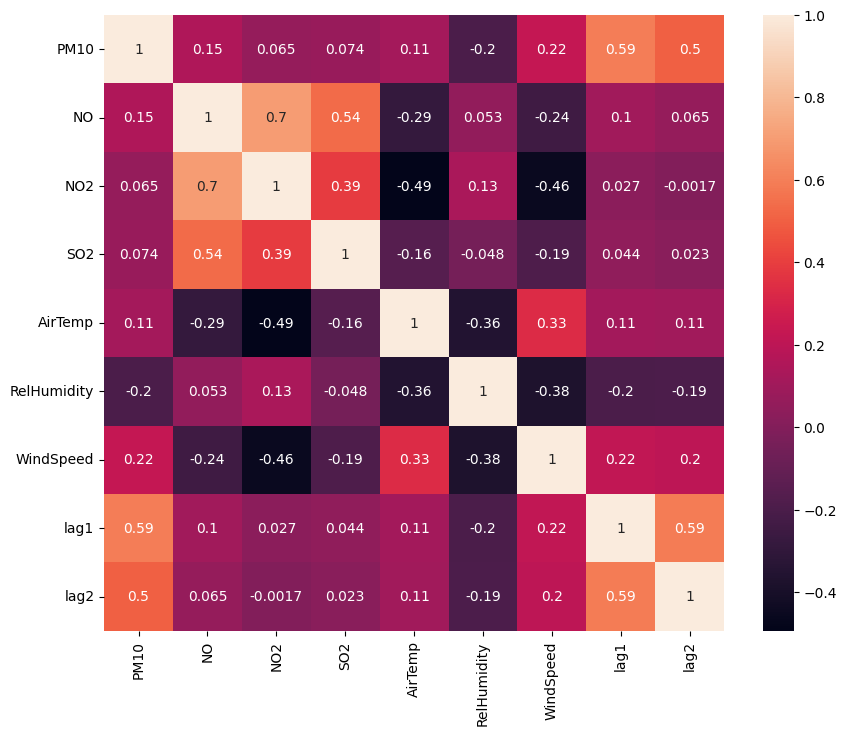

In [40]:
df_corr = df.drop('TimeStamp', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

df_corr = df_pm10.drop('TimeStamp', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

# The pearson correlation still favors the PM2.5 target choice, although not as heavily with outliers removed
# from the dataframe.

In [41]:
# Based on the available information, PM2.5 is the better choice for target variable.
# Domain knowledge suggests PM2.5 is possibly resposnible for more adverse health outcomes due to particulate size 
# leading to particulate matter embedding deep in lungs.
# PM2.5 has stronger Pearson correlation with pollutant freatures NO, NO2 and SO2 even once accounting for outliers


In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# checking for multicolinearity with VIF method for pollutants

#df_features = df[['NO', 'NO2', 'SO2', 'RelHumidity', 'WindSpeed']]
df_features = df[['NO', 'NO2', 'SO2',  'AirTemp', 'RelHumidity', 'WindSpeed']]
df_target = df['PM2.5']

vif = pd.DataFrame()
vif["Feature"] = df_features.columns
vif["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif

Feature        VIF
0           NO   3.373263
1          NO2   5.390534
2          SO2   2.786331
3      AirTemp  14.256221
4  RelHumidity  13.587869
5    WindSpeed   4.935844

In [43]:
# Still small indication of multicollinearity
# In Auckland humidity is higher in summer, so AirTemp and RelHumidity are likely to be highly correlated

df_features = df[['NO', 'NO2', 'SO2',  'RelHumidity', 'WindSpeed']]

vif = pd.DataFrame()
vif["Feature"] = df_features.columns
vif["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
vif

Feature       VIF
0           NO  3.368872
1          NO2  5.339076
2          SO2  2.733203
3  RelHumidity  6.663232
4    WindSpeed  3.510767

In [44]:
df.drop('AirTemp', axis=1, inplace=True)

In [45]:
from fastai.tabular.core import add_datepart

add_datepart(df, 'TimeStamp')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25044 entries, 2842 to 49886
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PM2.5                      25044 non-null  float64
 1   NO                         25044 non-null  float64
 2   NO2                        25044 non-null  float64
 3   SO2                        25044 non-null  float64
 4   RelHumidity                25044 non-null  float64
 5   WindSpeed                  25044 non-null  float64
 6   lag1                       25044 non-null  float64
 7   lag2                       25044 non-null  float64
 8   TimeStampYear              25044 non-null  int32  
 9   TimeStampMonth             25044 non-null  int32  
 10  TimeStampWeek              25044 non-null  int32  
 11  TimeStampDay               25044 non-null  int32  
 12  TimeStampDayofweek         25044 non-null  int32  
 13  TimeStampDayofyear         25044 non-null  int32

In [46]:
# Dropping temporal features which will not have impact on PM2.5 levels or model

df.drop([
    'TimeStampIs_month_end', 'TimeStampIs_month_start', 
    'TimeStampIs_quarter_end', 'TimeStampIs_quarter_start', 
    'TimeStampIs_year_end', 'TimeStampIs_year_start',
    'TimeStampElapsed', ], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25044 entries, 2842 to 49886
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM2.5               25044 non-null  float64
 1   NO                  25044 non-null  float64
 2   NO2                 25044 non-null  float64
 3   SO2                 25044 non-null  float64
 4   RelHumidity         25044 non-null  float64
 5   WindSpeed           25044 non-null  float64
 6   lag1                25044 non-null  float64
 7   lag2                25044 non-null  float64
 8   TimeStampYear       25044 non-null  int32  
 9   TimeStampMonth      25044 non-null  int32  
 10  TimeStampWeek       25044 non-null  int32  
 11  TimeStampDay        25044 non-null  int32  
 12  TimeStampDayofweek  25044 non-null  int32  
 13  TimeStampDayofyear  25044 non-null  int32  
dtypes: float64(8), int32(6)
memory usage: 2.3 MB


# Experimental Methods


In [47]:
df.describe(include='all')

PM2.5            NO           NO2           SO2   RelHumidity  \
count  25044.000000  25044.000000  25044.000000  25044.000000  25044.000000   
mean       6.271706      9.697444     15.410565      0.993967     70.879536   
std        4.439300     14.861467     12.909570      0.993932     12.785343   
min        0.000000      0.000000      0.000000      0.000000     26.900000   
25%        3.400000      1.100000      5.000000      0.400000     61.400000   
50%        5.500000      4.300000     11.900000      0.800000     71.600000   
75%        8.100000     12.000000     22.800000      1.300000     80.900000   
max      138.400000    109.500000     75.200000      8.200000    100.000000   

          WindSpeed          lag1          lag2  TimeStampYear  \
count  25044.000000  25044.000000  25044.000000   25044.000000   
mean       2.882978      6.065836      5.897860    2021.127216   
std        1.615249      4.772703      4.808086       1.387745   
min        0.100000     -9.700000    -12.300000    2019.000000   
25%        1.500000      3.200000      3.000000    2020.000000   
50%        2.700000      5.500000      5.300000    2021.000000   
75%        4.000000      8.100000      8.000000    2022.000000   
max        8.700000    138.400000    138.400000    2023.000000   

       TimeStampMonth  TimeStampWeek  TimeStampDay  TimeStampDayofweek  \
count    25044.000000   25044.000000  25044.000000        25044.000000   
mean         7.000319      28.566962     15.837805            2.975563   
std          3.268997      14.239668      8.812509            1.977462   
min          1.000000       1.000000      1.000000            0.000000   
25%          5.000000      18.000000      8.000000            1.000000   
50%          7.000000      30.000000     16.000000            3.000000   
75%         10.000000      41.000000     23.000000            5.000000   
max         12.000000      52.000000     31.000000            6.000000   

       TimeStampDayofyear  
count        25044.000000  
mean           197.673894  
std             99.414790  
min              1.000000  
25%            121.000000  
50%            204.000000  
75%            283.000000  
max            365.000000

### Features and target

In [48]:
X = df.drop(['PM2.5'], axis=1)  # Drop the target column and any other non-feature columns
y = df['PM2.5']

# Checking dimensions are as expected 
X.shape

(25044, 13)

### Manual split

In [49]:
# Choosing target and features
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

# Scaling the features
sc = StandardScaler()
X = sc.fit_transform(X)  # X is now a numpy array

# Calculate the split index
n = len(X)
split_idx = int(n * 0.7)

# Split the data using numpy slicing
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

# View dimensions
print("X_train set dimensions : {}".format(X_train.shape))
print("X_test set dimensions : {}".format(X_test.shape))
print("y_train set dimensions : {}".format(y_train.shape))
print("y_test set dimensions : {}".format(y_test.shape))


X_train set dimensions : (17530, 13)
X_test set dimensions : (7514, 13)
y_train set dimensions : (17530,)
y_test set dimensions : (7514,)


### Using Time Series Split

In [50]:
# # Execute this cell to use TimeSeriesSplit method and apply MLP Regression

# from sklearn.model_selection import TimeSeriesSplit

# # Choosing target and fetures
# X = df.drop('PM2.5', axis=1).values  
# y = df['PM2.5'].values  

# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Initialize TimeSeriesSplit with 5 splits
# tscv = TimeSeriesSplit(n_splits=5)

# # This will store the model scores or any other metric you wish to track
# scores = []

# # Iterate through the splits
# for train_index, test_index in tscv.split(X):
#     # Generate training and testing sets using the indices provided by TimeSeriesSplit
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Instantiate and train the MLPRegressor
#     model = MLPRegressor(hidden_layer_sizes=(25,), alpha=0.01,
#     activation='relu', solver='adam', max_iter=500, random_state=42)
#     model.fit(X_train, y_train)
    
#     # Predict and calculate the accuracy
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)
#     scores.append(rmse)
#     print(f'Train indices: {train_index[0]}-{train_index[-1]}, Test indices: {test_index[0]}-{test_index[-1]}, RMSE: {rmse}, R2: {r2}')

# # You can now review the scores to see how the model performs
# print("RMSE scores from each fold:", scores)

# # Conclusion: Using time series split leads to poor model quality in this instance

### train_test_split

In [51]:
# # Choosing target and fetures
# X = df.drop('PM2.5', axis=1).values  # Drop the target to isolate features
# y = df['PM2.5'].values  # Isolate the target variable

# # Scale the data
# sc = StandardScaler()
# X = sc.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print("X_train set dimensions : {}".format(X_train.shape))
# print("X_test set dimensions : {}".format(X_test.shape))
# print("y_train set dimensions : {}".format(y_train.shape))
# print("y_test set dimensions : {}".format(y_test.shape))

### Transform data

In [52]:
sc = StandardScaler()
X = sc.fit_transform(X)

## MLP Regression

In [53]:
from sklearn.metrics import mean_squared_error


mlp = MLPRegressor(
    hidden_layer_sizes=(25,),
    activation='relu',
    solver='adam',
    random_state=42,
    learning_rate_init=0.001
)

#Fit the model and make predictions
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)

mae = mean_absolute_error(y_test, mlp_predict)
rmse = np.sqrt(mean_squared_error(y_test, mlp_predict))
r2 = r2_score(y_test, mlp_predict)


print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.5553399534776804
Root Mean Square Error: 3.495156631097296
R-squared: 0.26104767832865383


C:\Users\vinni\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

best_rate = 0
best_rmse_score = float('inf')

for rate in learning_rates:
    mlp = MLPRegressor(hidden_layer_sizes=(25, ), max_iter=200, solver='adam', learning_rate_init=rate, random_state=42)
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
    mae = mean_absolute_error(y_test, mlp_pred)
    r2 = r2_score(y_test, mlp_pred)
    
    print(f"Learning rate: {rate} -> RMSE: {rmse} -> MAE: {mae} -> R2: {r2}")
    

    # Updating the best rate based on MSE
    if rmse < best_rmse_score:
        best_rmse_score = rmse
        best_rate = rate

print(f"Best rate: {best_rate} with RMSE of {best_rmse_score}")

# Best learning rate savedand used in following regression

C:\Users\vinni\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate: 0.001 -> RMSE: 3.495156631097296 -> MAE: 2.5553399534776804 -> R2: 0.26104767832865383
Learning rate: 0.01 -> RMSE: 4.108193575633971 -> MAE: 3.1170549908228136 -> R2: -0.020904058699696693
Learning rate: 0.05 -> RMSE: 3.529100078406002 -> MAE: 2.4588717279394174 -> R2: 0.2466252146307255
Learning rate: 0.1 -> RMSE: 3.6574607664100434 -> MAE: 2.573295466650183 -> R2: 0.19082494785326842
Learning rate: 0.2 -> RMSE: 3.418230081776108 -> MAE: 2.3626048365555588 -> R2: 0.29321761712231365
Learning rate: 0.5 -> RMSE: 3.437675376415979 -> MAE: 2.3712699647253044 -> R2: 0.28515339502196513
Learning rate: 1.0 -> RMSE: 4.134254297579487 -> MAE: 2.9764214845856194 -> R2: -0.033897547727040456
Best rate: 0.2 with RMSE of 3.418230081776108


In [55]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(mlp_predict, y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12.216119875903399


In [56]:
# Total number of neurons to distribute between two layers
total_neurons = 25

# Initialize variables to store the best configuration
best_config = None
best_mse = float('inf')
best_rmse = float('inf')

# Uncomment and adjust to manually select rate
learn_rate=0.01

for i in range(1, total_neurons):
    neurons_layer1 = total_neurons - i
    neurons_layer2 = i

    mlp = MLPRegressor(
        hidden_layer_sizes=(neurons_layer1, neurons_layer2),
        max_iter=500,
        solver='adam',
        activation='relu',
        learning_rate_init=learn_rate,
        random_state=42
    )


    # Fit and create predictions for model based on layer configuration
    mlp.fit(X_train, y_train)
    mlp_pred = mlp.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
    mae = mean_absolute_error(y_test, mlp_pred)
    r2 = r2_score(y_test, mlp_pred)

    print(f"Configuration: {neurons_layer1}-{neurons_layer2} -> RMSE: {rmse} -> MAE: {mae} -> R2: {r2}")

    # Best configuation by rmse
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_rmse_config = (neurons_layer1, neurons_layer2)

print(f"Best Configuration: {best_rmse_config} with RMSE: {best_rmse} with r2: {best_r2}")

Configuration: 24-1 -> RMSE: 3.8257336528603787 -> MAE: 2.80253148198601 -> R2: 0.11465488652158573
Configuration: 23-2 -> RMSE: 4.16596999916379 -> MAE: 3.1631276722036565 -> R2: -0.04982136859908004
Configuration: 22-3 -> RMSE: 3.4513859951348365 -> MAE: 2.4034299200326186 -> R2: 0.27943992123084416
Configuration: 21-4 -> RMSE: 3.7359697203358486 -> MAE: 2.7744531370379875 -> R2: 0.1557135340739192
Configuration: 20-5 -> RMSE: 4.04830948242882 -> MAE: 2.9232228501189668 -> R2: 0.008641935836234294
Configuration: 19-6 -> RMSE: 4.175730108302559 -> MAE: 3.0110214159331528 -> R2: -0.0547462114696311
Configuration: 18-7 -> RMSE: 3.869516102849429 -> MAE: 2.9188662296263757 -> R2: 0.09427480521765641
Configuration: 17-8 -> RMSE: 3.8181207281769916 -> MAE: 2.834046085888486 -> R2: 0.11817492224004011
Configuration: 16-9 -> RMSE: 3.639907281615152 -> MAE: 2.640975721262196 -> R2: 0.19857336030483352
Configuration: 15-10 -> RMSE: 4.227324917180759 -> MAE: 3.08978531554019 -> R2: -0.080971866

In [57]:
# Capacity of the Model: Different architectures provide different capacities. A network with more neurons in a 
# hidden layer can capture more complex patterns in the data. However, it can also lead to overfitting where the
# model learns the noise in the training data instead of generalizing from it.

# Distribution of Computational Power: The way neurons are distributed across layers affects how the network 
# processes features.For example, a larger first layer followed by a smaller second layer might be able to initially
# capture a broad representation of the input data, which is then refined by the second layer.

# Convergence Behavior: The configuration of the neural network can affect how well and how quickly it converges
# to a solution. Some configurations might get stuck in local minima or fail to converge if the gradient updates 
# do not effectively propagate back through the network.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [59]:
# LSTM model doesn't require lag variables as it is a RNN which address long term dependencies in data

df.drop(['lag1','lag2'], axis=1, inplace=True) 
df.head()
df.describe()

PM2.5            NO           NO2           SO2   RelHumidity  \
count  25044.000000  25044.000000  25044.000000  25044.000000  25044.000000   
mean       6.271706      9.697444     15.410565      0.993967     70.879536   
std        4.439300     14.861467     12.909570      0.993932     12.785343   
min        0.000000      0.000000      0.000000      0.000000     26.900000   
25%        3.400000      1.100000      5.000000      0.400000     61.400000   
50%        5.500000      4.300000     11.900000      0.800000     71.600000   
75%        8.100000     12.000000     22.800000      1.300000     80.900000   
max      138.400000    109.500000     75.200000      8.200000    100.000000   

          WindSpeed  TimeStampYear  TimeStampMonth  TimeStampWeek  \
count  25044.000000   25044.000000    25044.000000   25044.000000   
mean       2.882978    2021.127216        7.000319      28.566962   
std        1.615249       1.387745        3.268997      14.239668   
min        0.100000    2019.000000        1.000000       1.000000   
25%        1.500000    2020.000000        5.000000      18.000000   
50%        2.700000    2021.000000        7.000000      30.000000   
75%        4.000000    2022.000000       10.000000      41.000000   
max        8.700000    2023.000000       12.000000      52.000000   

       TimeStampDay  TimeStampDayofweek  TimeStampDayofyear  
count  25044.000000        25044.000000        25044.000000  
mean      15.837805            2.975563          197.673894  
std        8.812509            1.977462           99.414790  
min        1.000000            0.000000            1.000000  
25%        8.000000            1.000000          121.000000  
50%       16.000000            3.000000          204.000000  
75%       23.000000            5.000000          283.000000  
max       31.000000            6.000000          365.000000

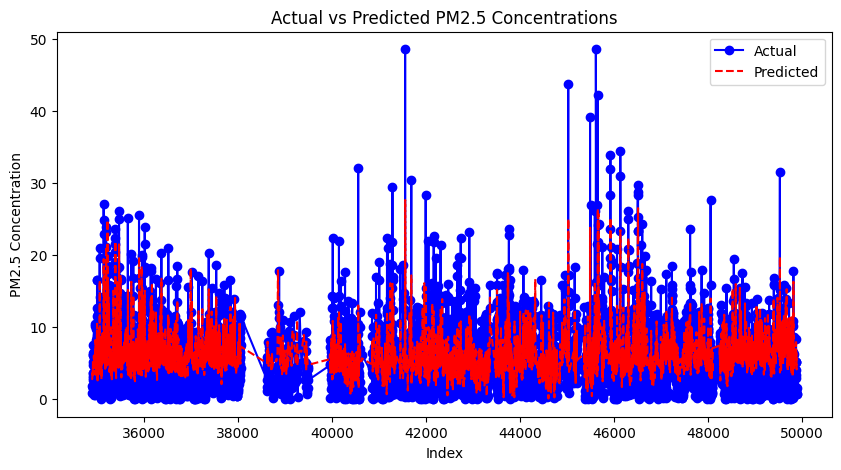

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue', marker='o')
plt.plot(y_test.index, mlp_predict, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted PM2.5 Concentrations')
plt.xlabel('Index')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

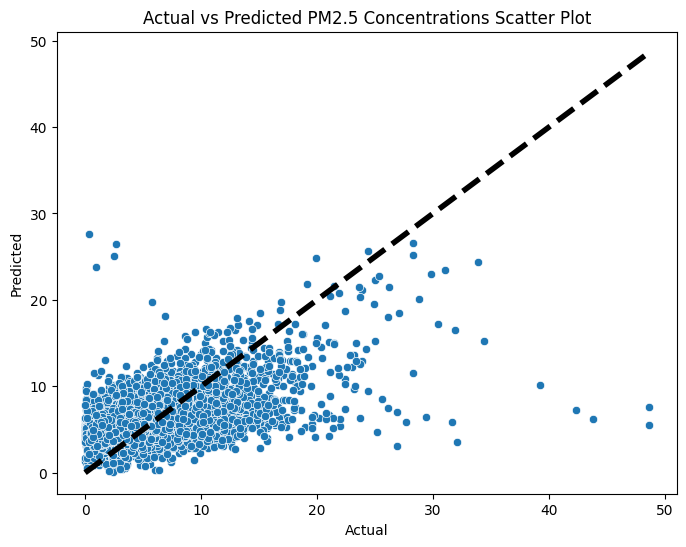

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=mlp_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PM2.5 Concentrations Scatter Plot')
plt.show()

C:\Users\vinni\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


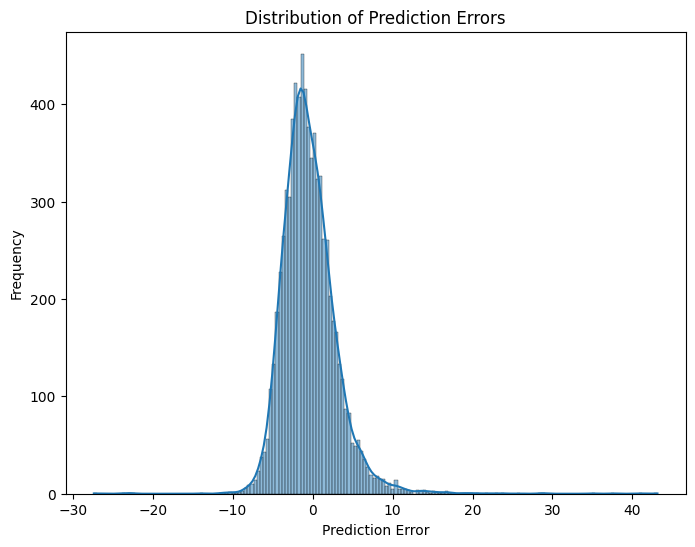

In [62]:
errors = y_test - mlp_predict
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

## LSTM MODEL

In [63]:
df.head()

PM2.5   NO   NO2  SO2  RelHumidity  WindSpeed  TimeStampYear  \
2842    2.0  0.8  10.8  0.0         78.6        0.9           2019   
2843    2.4  3.6  17.8  0.5         83.9        0.8           2019   
2844    2.2  0.6   9.8  0.0         86.0        0.8           2019   
2845    1.7  4.2  15.3  0.1         83.5        1.2           2019   
2846    1.3  4.9  13.1  0.6         79.9        1.6           2019   

      TimeStampMonth  TimeStampWeek  TimeStampDay  TimeStampDayofweek  \
2842               4             17            22                   0   
2843               4             17            22                   0   
2844               4             17            22                   0   
2845               4             17            22                   0   
2846               4             17            22                   0   

      TimeStampDayofyear  
2842                 112  
2843                 112  
2844                 112  
2845                 112  
2846                 112

In [64]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df.drop(['PM2.5'], axis=1))
# scaled_features_df = pd.DataFrame(scaled_features, columns=feature_columns)
# scaled_features_df.head()

In [65]:
# Convert to sequences
def to_sequences(data, seq_size=1):
    x = []
    y = []

    for i in range(len(data)-seq_size):
        window = data[i:(i+seq_size), :-1]
        x.append(window)
        y.append(data[i+seq_size, -1])
        
    return np.array(x), np.array(y)

seq_size = 10  # Number of time steps to look back 
X, y = to_sequences(scaled_features, seq_size)

In [66]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

### LSTM 2

Epoch 1/30
4381/4381 [==============================] - 18s 4ms/step - loss: 0.0026 - val_loss: 2.6310e-04
Epoch 2/30
4381/4381 [==============================] - 15s 3ms/step - loss: 0.0013 - val_loss: 3.3620e-04
Epoch 3/30
4381/4381 [==============================] - 15s 3ms/step - loss: 0.0013 - val_loss: 2.4447e-04
Epoch 4/30
4381/4381 [==============================] - 15s 3ms/step - loss: 0.0012 - val_loss: 5.3964e-04
Epoch 5/30
4381/4381 [==============================] - 15s 3ms/step - loss: 0.0010 - val_loss: 2.5512e-04
Epoch 6/30
4381/4381 [==============================] - 15s 3ms/step - loss: 9.9757e-04 - val_loss: 3.3933e-04
Epoch 7/30
4381/4381 [==============================] - 15s 3ms/step - loss: 0.0010 - val_loss: 4.6544e-04
Epoch 8/30
4381/4381 [==============================] - 15s 3ms/step - loss: 9.8424e-04 - val_loss: 3.6742e-04
Epoch 9/30
4381/4381 [==============================] - 15s 3ms/step - loss: 9.3458e-04 - val_loss: 4.1593e-04
Epoch 10/30
4381/4381 [==

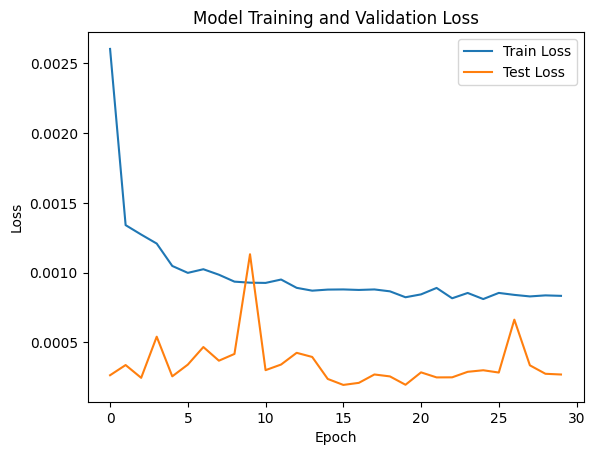

In [67]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

optimizer=Adam(learning_rate=0.01)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=4, validation_data=(X_test, y_test), verbose=1)

# Plotting the training and validation loss
import matplotlib.pyplot as palt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12251 (47.86 KB)
Trainable params: 12251 (47.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### LSTM 3

Epoch 1/30
1096/1096 [==============================] - 7s 5ms/step - loss: 0.0036 - val_loss: 3.5245e-04
Epoch 2/30
1096/1096 [==============================] - 5s 4ms/step - loss: 0.0012 - val_loss: 3.8964e-04
Epoch 3/30
1096/1096 [==============================] - 6s 6ms/step - loss: 9.6767e-04 - val_loss: 6.6476e-04
Epoch 4/30
1096/1096 [==============================] - 7s 6ms/step - loss: 9.1617e-04 - val_loss: 3.3790e-04
Epoch 5/30
1096/1096 [==============================] - 4s 4ms/step - loss: 9.1955e-04 - val_loss: 4.7312e-04
Epoch 6/30
1096/1096 [==============================] - 4s 4ms/step - loss: 9.2829e-04 - val_loss: 2.0857e-04
Epoch 7/30
1096/1096 [==============================] - 4s 4ms/step - loss: 8.7516e-04 - val_loss: 5.5308e-04
Epoch 8/30
1096/1096 [==============================] - 4s 4ms/step - loss: 8.5549e-04 - val_loss: 3.6530e-04
Epoch 9/30
1096/1096 [==============================] - 4s 4ms/step - loss: 8.4614e-04 - val_loss: 2.5100e-04
Epoch 10/30
1096/1

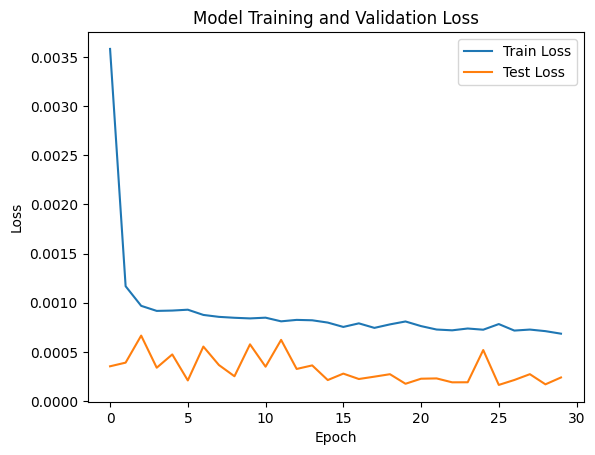

In [69]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

batch_size = 16
optimizer=Adam(learning_rate=0.01)

# Define the LSTM model
model_16b = Sequential()
model_16b.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_16b.add(Dropout(0.2))
model_16b.add(Dense(1))
model_16b.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model_16b.fit(X_train, y_train, epochs=30, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Plotting the training and validation loss
import matplotlib.pyplot as palt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
lstm_predictions = model.predict(X_test)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2_lstm = r2_score(y_test, lstm_predictions)
print("RMSE for LSTM Model:", rmse_lstm)
print("R2 for LSTM Model:", r2_lstm)

lstm_predictions_16b = model_16b.predict(X_test)
rmse_lstm_16b = np.sqrt(mean_squared_error(y_test, lstm_predictions_16b))
r2_lstm_16b = r2_score(y_test, lstm_predictions_16b)
print("RMSE for LSTM Model 16 batches:", rmse_lstm_16b)
print("R2 for LSTM Model 16 batches:", r2_lstm_16b)





235/235 [==============================] - 1s 3ms/step
RMSE for LSTM Model: 0.01638155759132071
R2 for LSTM Model: 0.9964037369329772
235/235 [==============================] - 1s 2ms/step
RMSE for LSTM Model 16 batches: 0.015452293665660371
R2 for LSTM Model 16 batches: 0.9968001695027587


In [73]:
print("RMSE for MLP Model:", best_rmse)
print("R2 for MLP Model:", best_r2)

RMSE for MLP Model: 3.312963401035184
R2 for MLP Model: 0.33607899569735755


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lstm_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted PM2.5 Concentrations Scatter Plot LSTM')
plt.show()